# Step 1: Load and Prepare the Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\\Users\\aliev\\OneDrive\\Desktop\\datasets\\covid_19_data.csv")

In [33]:
print(df.head(5))

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


# Step 2: Data Exploration and Understanding

In [18]:
print(df.describe())

               SNo     Confirmed       Deaths     Recovered
count  6722.000000   6722.000000  6722.000000   6722.000000
mean   3361.500000    601.195924    19.855846    226.341267
std    1940.618587   4896.332140   204.486922   2556.035202
min       1.000000      0.000000     0.000000      0.000000
25%    1681.250000      2.000000     0.000000      0.000000
50%    3361.500000     13.000000     0.000000      0.000000
75%    5041.750000    108.000000     1.000000     11.000000
max    6722.000000  67800.000000  3122.000000  56927.000000


In [19]:
print(df.isnull().sum())

SNo                   0
ObservationDate       0
Province/State     2769
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


# Step 3: Data Preprocessing

In [34]:
cols = []
for col in df.columns:
    cols.append(col.replace(" ", "_"))
df.columns=cols

df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [35]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
# df['last_update'] = pd.to_datetime(df['last_update'])

# Step 4: Feature Engineering

In [36]:
# Sort data by date
df = df.sort_values(by='ObservationDate')

# Create numerical day count since the start of the observation
df['Day'] = (df['ObservationDate'] - df['ObservationDate'].min()).dt.days

# Select features and target variables
features = df[['Day']]
targets = df[['Confirmed', 'Deaths', 'Recovered']]

# Calculate 'Infected' as a target variable
df['Infected'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
targets['Infected'] = df['Infected']


C:\Users\aliev\AppData\Local\Temp\ipykernel_24160\1011251213.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets['Infected'] = df['Infected']


# Step 5: Train-Test Split

In [38]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)

# Step 6: Train the Linear Regression Model

In [39]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

# Step 7: Make Predictions

In [40]:
# Predict for the next 7 days
future_days = np.array([X_train['Day'].max() + i for i in range(1, 8)]).reshape(-1, 1)
predictions = model.predict(future_days)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, columns=['Confirmed', 'Deaths', 'Recovered', 'Infected'])
predictions_df['Day'] = future_days

print(predictions_df)

    Confirmed     Deaths   Recovered    Infected  Day
0  694.452788  24.495843  353.528247  316.428698   52
1  700.493967  24.833275  361.096470  314.564223   53
2  706.535147  25.170706  368.664692  312.699748   54
3  712.576326  25.508138  376.232915  310.835273   55
4  718.617505  25.845569  383.801138  308.970798   56
5  724.658684  26.183000  391.369360  307.106324   57
6  730.699864  26.520432  398.937583  305.241849   58


c:\Users\aliev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Step 8: Evaluate the Model

In [41]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9195307.945041388


# Step 9: Visualization

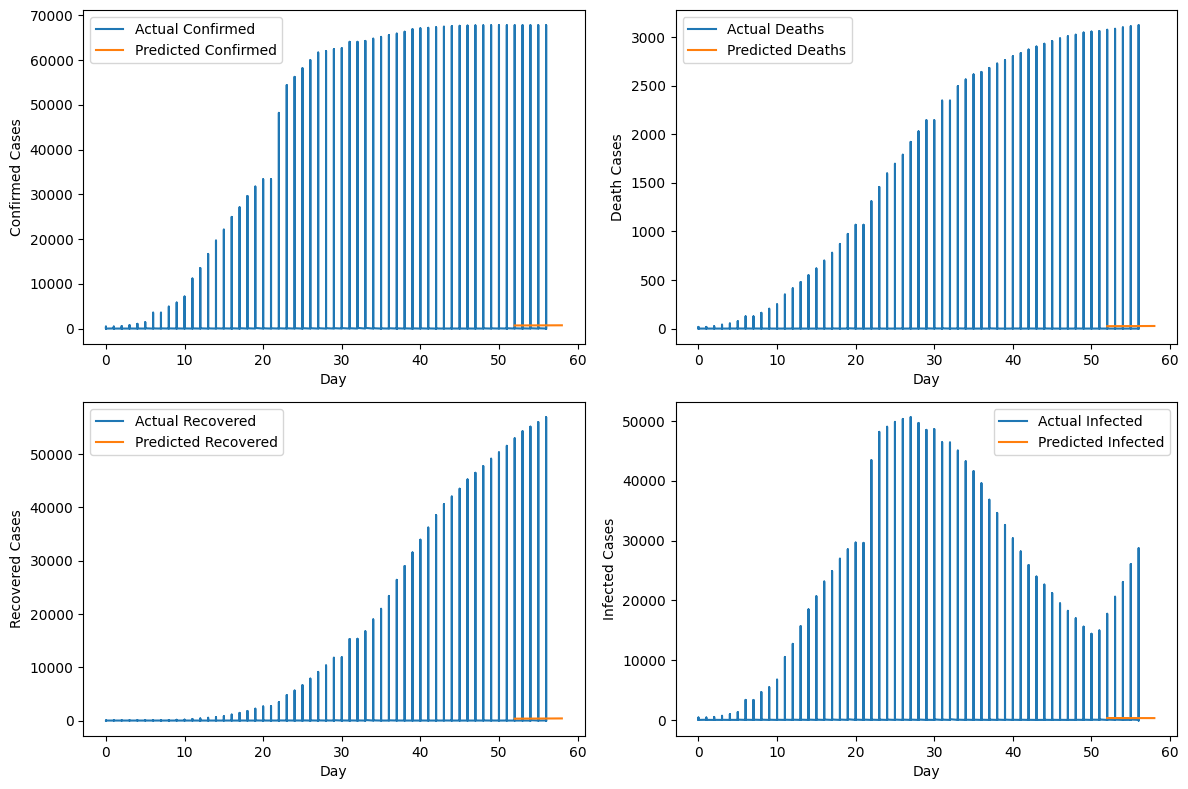

In [43]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 8))

# Plot Confirmed cases
plt.subplot(2, 2, 1)
plt.plot(df['Day'], df['Confirmed'], label='Actual Confirmed')
plt.plot(predictions_df['Day'], predictions_df['Confirmed'], label='Predicted Confirmed')
plt.xlabel('Day')
plt.ylabel('Confirmed Cases')
plt.legend()

# Plot Deaths cases
plt.subplot(2, 2, 2)
plt.plot(df['Day'], df['Deaths'], label='Actual Deaths')
plt.plot(predictions_df['Day'], predictions_df['Deaths'], label='Predicted Deaths')
plt.xlabel('Day')
plt.ylabel('Death Cases')
plt.legend()

# Plot Recovered cases
plt.subplot(2, 2, 3)
plt.plot(df['Day'], df['Recovered'], label='Actual Recovered')
plt.plot(predictions_df['Day'], predictions_df['Recovered'], label='Predicted Recovered')
plt.xlabel('Day')
plt.ylabel('Recovered Cases')
plt.legend()

# Plot Infected cases
plt.subplot(2, 2, 4)
plt.plot(df['Day'], df['Infected'], label='Actual Infected')
plt.plot(predictions_df['Day'], predictions_df['Infected'], label='Predicted Infected')
plt.xlabel('Day')
plt.ylabel('Infected Cases')
plt.legend()

plt.tight_layout()
plt.show()